## Time Series Forecasting with Facebook Prophet 
### Documentation Link: https://facebook.github.io/prophet/docs/quick_start.html

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import seaborn as sns
sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize':(12.5,6)})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/foo.txt

Mounted at /content/drive
Hello Google Drive!

In [ ]:
#load data from folder
filepath = 'drive/My Drive/MSc WIN/05_HS2020/VMAT/Data/final_df.csv'
df=pd.read_csv(filepath)
df=df[['Date','shelter']]
df=df.rename(columns={'Date':'ds','shelter':'y'})
df.ds=df.ds.astype('datetime64')

Text(0.5, 0, 'time')

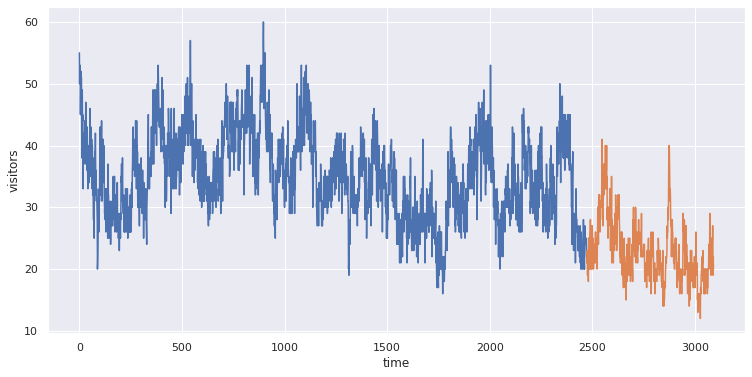

In [ ]:
#split test train 80:20
train=df.loc[:round(df.ds.size*0.8)]
test=df.loc[round(df.ds.size*0.8):]

plt.plot(train.y)
plt.plot(test.y)
plt.ylabel('visitors')
plt.xlabel('time')

In [ ]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [ ]:
#define model & change points when sieber opens/closes
from fbprophet import Prophet
model = Prophet(changepoints=['2012-11-15','2013-11-15','2014-11-15','2015-11-15','2016-11-15','2017-11-15','2018-11-15',
                              '2013-04-15','2014-04-15','2015-04-15','2016-04-15','2017-04-15','2018-04-15']
                )

#add swiss holidays
model.add_country_holidays(country_name='CH')

#fit model and make predictions
model.fit(train)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast.corr().yhat

trend                         0.723560
yhat_lower                    0.997550
yhat_upper                    0.997206
trend_lower                   0.722504
trend_upper                   0.686260
Auffahrt                     -0.046160
Auffahrt_lower               -0.046160
Auffahrt_upper               -0.046160
Karfreitag                    0.039230
Karfreitag_lower              0.039230
Karfreitag_upper              0.039230
Nationalfeiertag              0.021500
Nationalfeiertag_lower        0.021500
Nationalfeiertag_upper        0.021500
Neujahrestag                  0.053246
Neujahrestag_lower            0.053246
Neujahrestag_upper            0.053246
Ostermontag                   0.011621
Ostermontag_lower             0.011621
Ostermontag_upper             0.011621
Ostern                        0.030343
Ostern_lower                  0.030343
Ostern_upper                  0.030343
Pfingsten                    -0.047613
Pfingsten_lower              -0.047613
Pfingsten_upper          

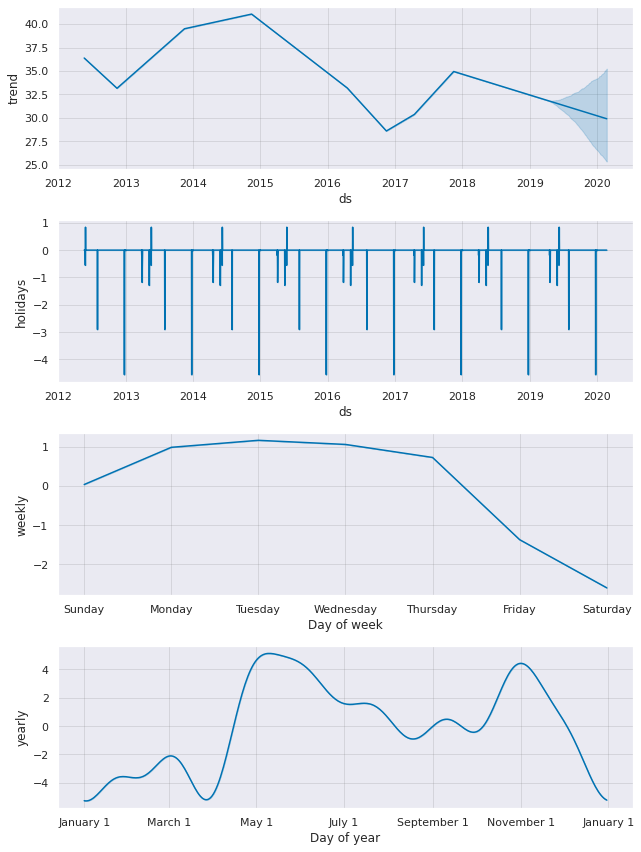

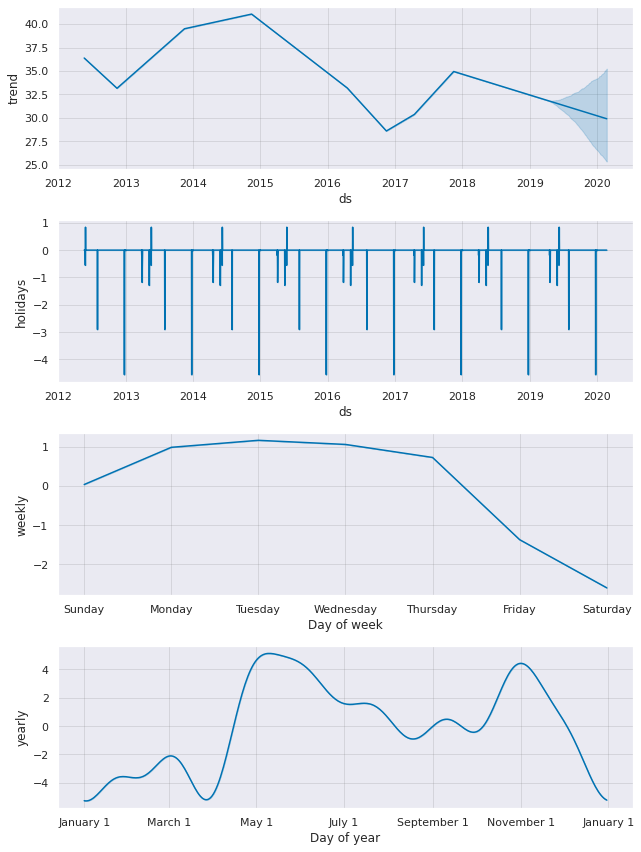

In [ ]:
model.plot_components(forecast)

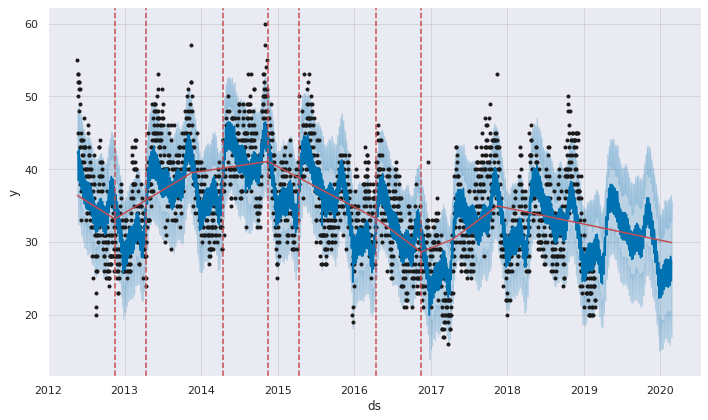

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

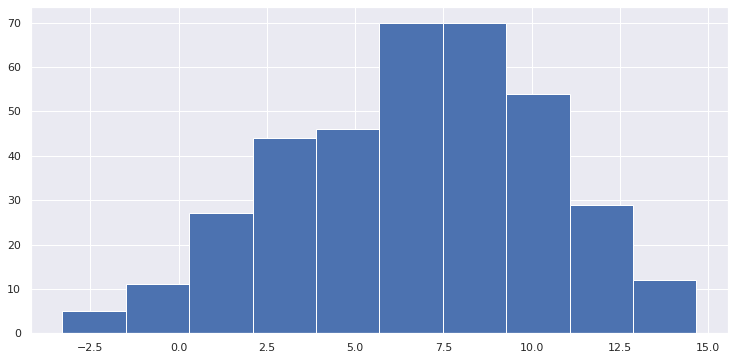

In [ ]:
val=pd.merge(forecast[['ds','yhat']],test,how='right',on='ds')
val['dif']=val.yhat-val.y
val=val.dropna(axis=0)
val.dif.hist()

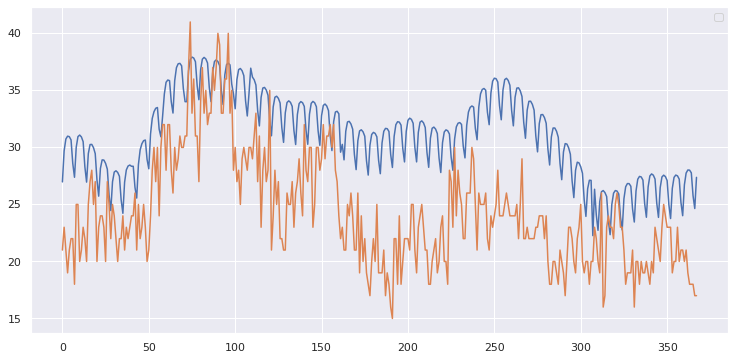

In [ ]:
plt.plot(val.yhat)
plt.plot(val.y)
plt.legend()

In [ ]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Auffahrt,Auffahrt_lower,Auffahrt_upper,Karfreitag,Karfreitag_lower,Karfreitag_upper,Nationalfeiertag,Nationalfeiertag_lower,Nationalfeiertag_upper,Neujahrestag,Neujahrestag_lower,Neujahrestag_upper,Ostermontag,Ostermontag_lower,Ostermontag_upper,Ostern,Ostern_lower,Ostern_upper,Pfingsten,Pfingsten_lower,Pfingsten_upper,Pfingstmontag,Pfingstmontag_lower,Pfingstmontag_upper,Weihnachten,Weihnachten_lower,Weihnachten_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.0,2830.0,2830.0,2830.000000
mean,34.695972,28.621317,40.753261,34.470439,34.963859,-0.003194,-0.003194,-0.003194,-0.000470,-0.000470,-0.000470,-0.008222,-0.008222,-0.008222,-0.000047,-0.000047,-0.000047,-0.001313,-0.001313,-0.001313,-0.002921,-0.002921,-0.002921,-0.001568,-0.001568,-0.001568,0.002371,0.002371,0.002371,-0.012896,-0.012896,-0.012896,-0.022102,-0.022102,-0.022102,-0.028260,-0.028260,-0.028260,-0.000789,-0.000789,-0.000789,0.006947,0.006947,0.006947,0.0,0.0,0.0,34.673870
std,3.480777,5.011818,4.834797,3.826250,3.278434,0.064160,0.064160,0.064160,0.009449,0.009449,0.009449,0.154455,0.154455,0.154455,0.000887,0.000887,0.000887,0.026377,0.026377,0.026377,0.058660,0.058660,0.058660,0.029448,0.029448,0.029448,0.044538,0.044538,0.044538,0.242242,0.242242,0.242242,3.397332,3.397332,3.397332,0.305279,0.305279,0.305279,1.343537,1.343537,1.343537,3.090881,3.090881,3.090881,0.0,0.0,0.0,4.920455
min,28.613287,13.849214,26.010147,25.161979,28.613287,-1.291426,-1.291426,-1.291426,-0.190199,-0.190199,-0.190199,-2.908621,-2.908621,-2.908621,-0.016698,-0.016698,-0.016698,-0.530931,-0.530931,-0.530931,-1.180726,-1.180726,-1.180726,-0.554543,-0.554543,-0.554543,0.000000,0.000000,0.000000,-4.561785,-4.561785,-4.561785,-10.444673,-10.444673,-10.444673,-4.561785,-4.561785,-4.561785,-2.600476,-2.600476,-2.600476,-5.275784,-5.275784,-5.275784,0.0,0.0,0.0,19.920284
25%,31.924792,25.102271,37.239047,31.924792,32.681404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.633806,-2.633806,-2.633806,0.000000,0.000000,0.000000,-1.371563,-1.371563,-1.371563,-2.912540,-2.912540,-2.912540,0.0,0.0,0.0,31.195515
50%,34.161011,28.603620,40.705656,34.161011,34.340136,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.279535,0.279535,0.279535,0.000000,0.000000,0.000000,0.726764,0.726764,0.726764,0.168364,0.168364,0.168364,0.0,0.0,0.0,34.677053
75%,37.539916,32.048978,44.067228,37.539916,37.539916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.551490,2.551490,2.551490,0.000000,0.000000,0.000000,1.059076,1.059076,1.059076,2.347304,2.347304,2.347304,0.0,0.0,0.0,38.021880
max,41.056181,40.832807,52.694143,41.056181,41.056181,0.000000,0.000000,0.000